In [1]:
from tensorflow import keras
import numpy as np

In [2]:
X = np.load('X.npy')
y = np.load('y.npy')

In [4]:
print(X.shape)
print(X[0])

(25000, 10, 3)
[[  0.803     10.728925 102.      ]
 [  0.5       10.728925 102.      ]
 [  0.603     10.728925 102.      ]
 [  0.711     10.728925 130.      ]
 [  0.937     10.728925 130.      ]
 [  1.051     10.728925 130.      ]
 [  1.118     32.       108.      ]
 [  4.87      32.       108.      ]
 [  4.973     33.       108.      ]
 [  5.199     39.       108.      ]]


In [5]:
print(y.shape)
print(y[0])

(25000,)
6.499


In [18]:
random_selection = np.random.randint(0, X.shape[0], 4) # 0=low, X.shape[0]=25000=high, 4=size
random_selection

array([18453, 24671, 13970, 20197])

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

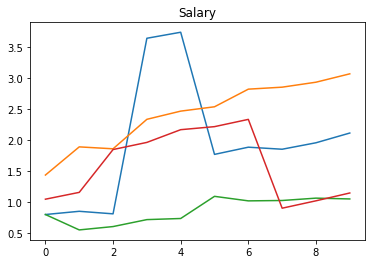

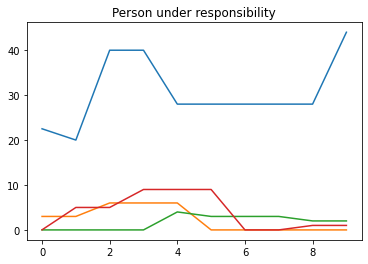

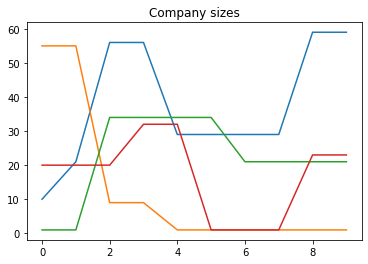

In [19]:
random_selection = np.random.randint(0, X.shape[0], 4)

plt.title('Salary')
for r in random_selection:
    plt.plot(X[r, :, 0])
plt.show()

plt.title('Person under responsibility')
for r in random_selection:
    plt.plot(X[r, :, 1])
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2])
plt.show()

In [15]:
X[0, :, 0] #== X[0][:,0]

array([0.803, 0.5  , 0.603, 0.711, 0.937, 1.051, 1.118, 4.87 , 4.973,
       5.199], dtype=float32)

In [16]:
X[0, :, 1] #== X[0, :, 1]

array([10.728925, 10.728925, 10.728925, 10.728925, 10.728925, 10.728925,
       32.      , 32.      , 33.      , 39.      ], dtype=float32)

In [10]:
X[0, :, 2] #==X[0][:,2]

array([102., 102., 102., 130., 130., 130., 108., 108., 108., 108.],
      dtype=float32)

In [4]:
import seaborn as sns


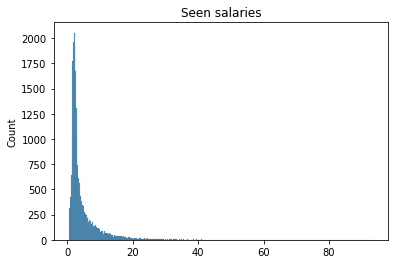

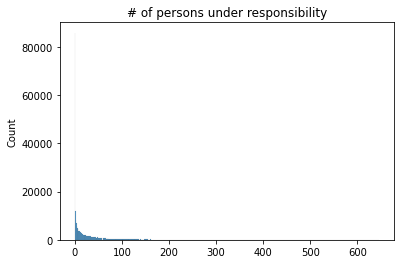

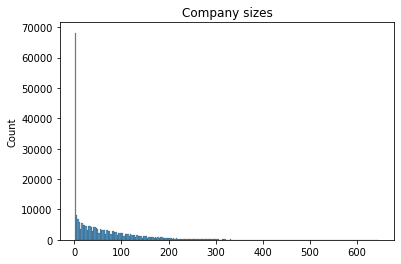

In [27]:
plt.title("Seen salaries")
sns.histplot(X[:, -1, 0].flatten())
plt.show()

plt.title("# of persons under responsibility")
sns.histplot(X[:, :, 1].flatten())
plt.show()

plt.title("Company sizes")
sns.histplot(X[:, :, 2].flatten())
plt.show()

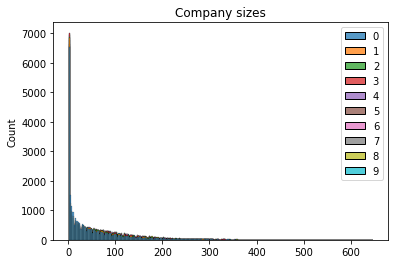

In [38]:
plt.title("Company sizes")
sns.histplot(X[:, :, 2])
plt.show()

In [35]:
X[:, :, 2][0].flatten()

array([102., 102., 102., 130., 130., 130., 108., 108., 108., 108.],
      dtype=float32)

In [37]:
X[:, :, 2][0]

array([102., 102., 102., 130., 130., 130., 108., 108., 108., 108.],
      dtype=float32)

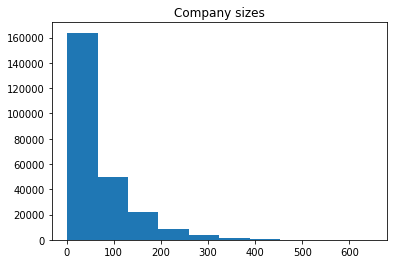

In [32]:
plt.title("Company sizes")
plt.hist(X[:, :, 2].flatten())
plt.show()

In [21]:
X[:, -1, 0][0]

5.199

In [23]:
X[:, :, 1][0]

array([10.728925, 10.728925, 10.728925, 10.728925, 10.728925, 10.728925,
       32.      , 32.      , 33.      , 39.      ], dtype=float32)

In [24]:
X[:, :, 2][0]

array([102., 102., 102., 130., 130., 130., 108., 108., 108., 108.],
      dtype=float32)

In [22]:
X[0]

array([[  0.803   ,  10.728925, 102.      ],
       [  0.5     ,  10.728925, 102.      ],
       [  0.603   ,  10.728925, 102.      ],
       [  0.711   ,  10.728925, 130.      ],
       [  0.937   ,  10.728925, 130.      ],
       [  1.051   ,  10.728925, 130.      ],
       [  1.118   ,  32.      , 108.      ],
       [  4.87    ,  32.      , 108.      ],
       [  4.973   ,  33.      , 108.      ],
       [  5.199   ,  39.      , 108.      ]], dtype=float32)

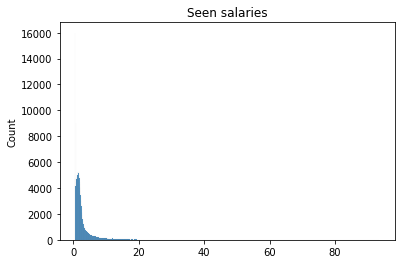

In [39]:
plt.title("Seen salaries")
sns.histplot(X[:, :, 0].flatten())
plt.show()

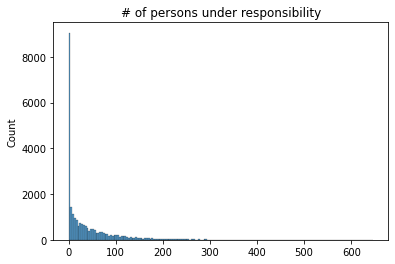

In [40]:
plt.title("# of persons under responsibility")
sns.histplot(X[:, -1, 1].flatten())
plt.show()

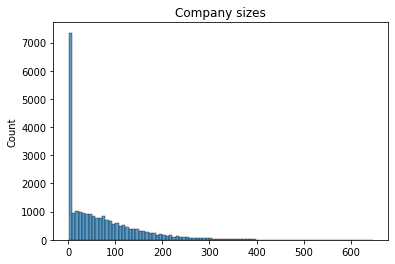

In [41]:
plt.title("Company sizes")
sns.histplot(X[:, -1, 2].flatten())
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
from keras.layers.experimental.preprocessing import Normalization
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Flatten

In [44]:
pip install keras

You should consider upgrading via the '/home/antoniosf/.pyenv/versions/3.8.6/envs/post_boot/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
normalizer = Normalization()
normalizer.adapt(X_train)

In [8]:
model = Sequential()
model.add(normalizer)
model.add(SimpleRNN(units=20, activation='tanh'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, None, 3)           7         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 20)                480       
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 708
Trainable params: 701
Non-trainable params: 7
_________________________________________________________________


In [50]:
7 + \
(20 * 3) + (20**2) + 20 + \
10 * 20 + 10 + \
1 * 10 + 1

708

In [51]:
20*(20+3+1)

480

In [52]:
10*20+10

210

In [53]:
10*1+1

11

In [9]:
def compile_model(model):
    model.compile(loss='mse',
                  optimizer='rmsprop', 
                  metrics=['mae'])
    return model

model = compile_model(model)

In [10]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(patience=3, restore_best_weights=True)

model.fit(X_train, y_train,
          epochs=100, 
          batch_size=32, 
          validation_split=0.2,
          callbacks=[es])

Epoch 1/100
500/500 [==============================] - 5s 7ms/step - loss: 29.7878 - mae: 2.8640 - val_loss: 4.3885 - val_mae: 0.6862
Epoch 2/100
500/500 [==============================] - 2s 5ms/step - loss: 3.4996 - mae: 0.6162 - val_loss: 2.1130 - val_mae: 0.4585
Epoch 3/100
500/500 [==============================] - 2s 5ms/step - loss: 1.1750 - mae: 0.4227 - val_loss: 1.4258 - val_mae: 0.3808
Epoch 4/100
500/500 [==============================] - 2s 5ms/step - loss: 1.2366 - mae: 0.4062 - val_loss: 1.2413 - val_mae: 0.3675
Epoch 5/100
500/500 [==============================] - 2s 5ms/step - loss: 0.9080 - mae: 0.3633 - val_loss: 1.1509 - val_mae: 0.3857
Epoch 6/100
500/500 [==============================] - 2s 5ms/step - loss: 0.8064 - mae: 0.3529 - val_loss: 1.0559 - val_mae: 0.3446
Epoch 7/100
500/500 [==============================] - 2s 5ms/step - loss: 0.9308 - mae: 0.3631 - val_loss: 1.0544 - val_mae: 0.4676
Epoch 8/100
500/500 [==============================] - 2s 5ms/step -

In [57]:
model.history.history["mae"]

[1.5212968587875366,
 0.4649676978588104,
 0.37541937828063965,
 0.3581320643424988,
 0.34899574518203735,
 0.3458189368247986,
 0.3428471088409424,
 0.33882904052734375,
 0.3385581076145172,
 0.33357852697372437,
 0.3348938524723053,
 0.331182599067688,
 0.33005061745643616,
 0.32768264412879944,
 0.32815298438072205,
 0.32944416999816895,
 0.3252241313457489,
 0.3262524902820587,
 0.32236164808273315,
 0.3223267197608948,
 0.32079195976257324,
 0.31961044669151306]

In [62]:
_.history["mae"]

[0.322583943605423,
 0.32062557339668274,
 0.32387128472328186,
 0.31934696435928345]

In [63]:
plt.plot(_.history["mae"])
plt.plot(_.history["val_mae"])

AttributeError: 'list' object has no attribute 'history'

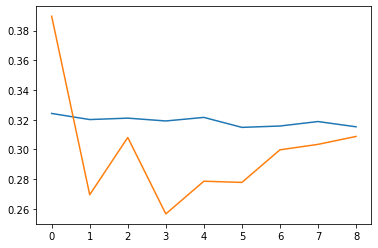

In [66]:
plt.plot(model.history.history["mae"])
plt.plot(model.history.history["val_mae"])

In [67]:
model_mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Model Mean Absolute Error {model_mae[1]:.4f}')

Model Mean Absolute Error 0.2934


In [11]:
def constant_prediction(X, y):
    error = []
    for xx, yy in zip(X, y):
        last_salary = xx[-1][0]
        error.append(yy - last_salary)
        
    return error

error = constant_prediction(X, y)

print(f'Constant Mean Absolute Error {np.mean(np.abs(error)):.4f}')

Constant Mean Absolute Error 0.5952


In [12]:
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

model_LSTM = Sequential()
model_LSTM.add(normalizer)
model_LSTM.add(LSTM(units=20, activation='tanh'))
model_LSTM.add(Dense(10, activation='relu'))
model_LSTM.add(Dense(1, activation='linear'))

model_LSTM = compile_model(model_LSTM)

es = EarlyStopping(patience=5, restore_best_weights=True)

history_LSTM = model_LSTM.fit(X_train, y_train,
          epochs=100, 
          batch_size=32, 
          validation_split=0.2,
          callbacks=[es], verbose=1)

In [13]:
model_LSTM.evaluate(X_test, y_test)

157/157 [==============================] - 1s 4ms/step - loss: 0.4697 - mae: 0.2440


[0.4696681499481201, 0.2440359890460968]

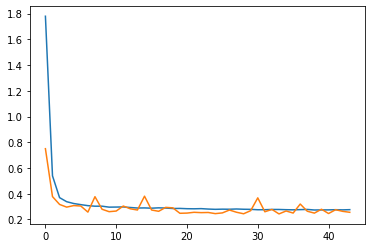

In [14]:
plt.plot(history_LSTM.history["mae"])
plt.plot(history_LSTM.history["val_mae"])

In [15]:


! wget "http://storage.googleapis.com/data-sciences-bootcamp/ECG_data.zip"
! unzip ECG_data.zip
! rm ECG_data.zip



--2021-05-19 21:53:25--  http://storage.googleapis.com/data-sciences-bootcamp/ECG_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:4001:827::2010, 2a00:1450:4001:828::2010, 2a00:1450:4001:829::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:4001:827::2010|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30932601 (29M) [application/zip]
Saving to: ‘ECG_data.zip’

ECG_data.zip        100%[===================>]  29.50M  6.80MB/s    in 4.4s    

2021-05-19 21:53:30 (6.69 MB/s) - ‘ECG_data.zip’ saved [30932601/30932601]

Archive:  ECG_data.zip
   creating: ECG_data/
  inflating: ECG_data/X.npy          
  inflating: __MACOSX/ECG_data/._X.npy  
  inflating: ECG_data/y.npy          
  inflating: __MACOSX/ECG_data/._y.npy  


In [16]:


import numpy as np

X = np.load('ECG_data/X.npy', allow_pickle=True).tolist()
y = np.load('ECG_data/y.npy', allow_pickle=True).tolist()

print(len(X), " time series")



87554  time series


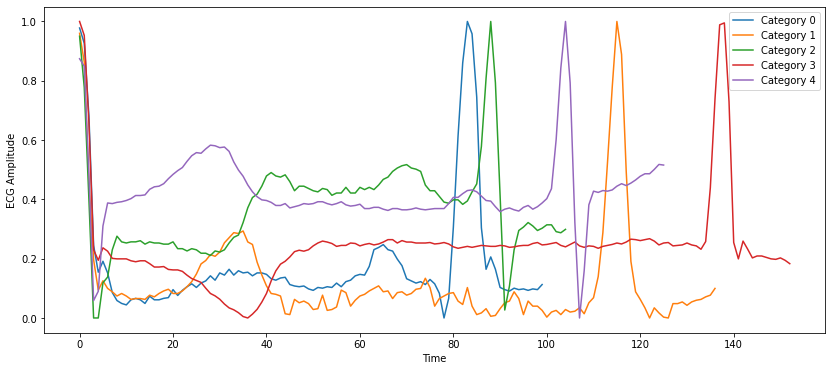

In [17]:


import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
for i in range(5):
    idx_C = np.argwhere(np.array(y) == i)
    plt.plot(X[idx_C[0][0]], label=f'Category {i}')
    
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('ECG Amplitude')
plt.show()



In [24]:
len(X[2])

95

In [25]:
length=[]
for i in range(len(X)):
    length.append(len(X[i]))


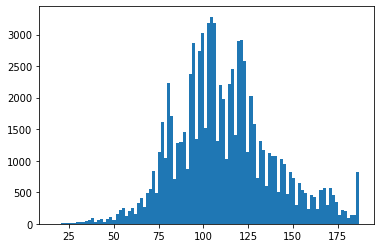

In [27]:
plt.hist(length, bins=100)
plt.show()

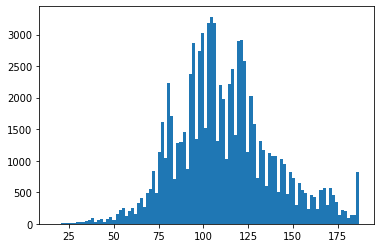

In [26]:
plt.hist([len(_) for _ in X], bins=100)
plt.show()

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X)
X_pad[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [31]:
X_pad = pad_sequences(X, dtype=float)
# X_pad.shape
X_pad[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
X_pad = pad_sequences(X, dtype='float32', padding='post', value=-1)
X_pad[0]

array([ 0.97794116,  0.9264706 ,  0.6813725 ,  0.24509804,  0.15441176,
        0.19117647,  0.15196079,  0.08578432,  0.05882353,  0.04901961,
        0.04411765,  0.06127451,  0.06617647,  0.06127451,  0.04901961,
        0.07352941,  0.06127451,  0.06127451,  0.06617647,  0.06862745,
        0.09558824,  0.0759804 ,  0.09313726,  0.10539216,  0.11519608,
        0.10294118,  0.11764706,  0.125     ,  0.14215687,  0.12745099,
        0.15196079,  0.14460784,  0.16421568,  0.14460784,  0.15931372,
        0.15196079,  0.15441176,  0.14215687,  0.15196079,  0.15196079,
        0.14705883,  0.13235295,  0.12745099,  0.13480392,  0.13725491,
        0.1127451 ,  0.10784314,  0.10539216,  0.10784314,  0.09803922,
        0.09313726,  0.10294118,  0.1004902 ,  0.10539216,  0.10294118,
        0.11764706,  0.10539216,  0.12254902,  0.12745099,  0.14215687,
        0.14705883,  0.14460784,  0.1740196 ,  0.23039216,  0.23774509,
        0.24754901,  0.23039216,  0.2254902 ,  0.1985294 ,  0.17

In [33]:
assert X_pad.shape == (87554, 187)

In [43]:
X_pad = np.expand_dims(X_pad, 2)

In [44]:
X_pad.shape

(87554, 187, 1)

In [45]:
assert(X_pad.shape == (87554, 187, 1))

In [46]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y)
y_cat.shape

(87554, 5)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad, y_cat, train_size=0.8)

In [49]:
from tensorflow.keras import layers
model = Sequential()
model.add(layers.Masking(mask_value=-1., input_shape=(187,1)))
model.add(layers.GRU(units=20, activation='tanh', return_sequences=True))
model.add(layers.GRU(units=20, activation='tanh', return_sequences=False))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 187, 1)            0         
_________________________________________________________________
gru (GRU)                    (None, 187, 20)           1380      
_________________________________________________________________
gru_1 (GRU)                  (None, 20)                2520      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 255       
Total params: 5,205
Trainable params: 5,205
Non-trainable params: 0
____________________________________________________

In [50]:
es = EarlyStopping(patience=2)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.fit(X_train, y_train, 
              epochs=75, 
              batch_size=256, 
              verbose=1, 
              callbacks = [es],
              validation_split=0.2)

model.evaluate(X_test, y_test)

Epoch 1/75
219/219 [==============================] - 83s 321ms/step - loss: 0.8647 - accuracy: 0.8183 - val_loss: 0.6681 - val_accuracy: 0.8241
Epoch 2/75
219/219 [==============================] - 67s 306ms/step - loss: 0.6705 - accuracy: 0.8289 - val_loss: 0.6713 - val_accuracy: 0.8241
Epoch 3/75
548/548 [==============================] - 22s 41ms/step - loss: 0.6628 - accuracy: 0.8266


[0.6627703309059143, 0.826623260974884]

In [51]:
model.evaluate(X_test, y_test)

548/548 [==============================] - 24s 43ms/step - loss: 0.6628 - accuracy: 0.8266


[0.6627703309059143, 0.826623260974884]

In [52]:
sum_ = np.sum(y_train, axis=0)
sum_

array([57996.,  1740.,  4630.,   532.,  5145.], dtype=float32)

In [53]:
predicted_category = np.argmax(sum_)
predicted_category

0

In [54]:
good_prediction = np.sum(y_test, axis=0)
good_prediction

array([14475.,   483.,  1158.,   109.,  1286.], dtype=float32)

In [55]:
good_prediction=good_prediction[predicted_category]

In [56]:
baseline_result = good_prediction/len(y_test)

print(f'Baseline accuracy: {baseline_result}')

Baseline accuracy: 0.8266232653760494


In [57]:
y_pred = model.predict(X_test)

In [58]:
import pandas as pd
pd.DataFrame(y_pred).mean().sort_values()

3    0.006334
1    0.019009
2    0.054353
4    0.070061
0    0.850241
dtype: float32

In [59]:
pd.value_counts(y,normalize=True, ascending=True)

3    0.007321
1    0.025390
2    0.066108
4    0.073452
0    0.827729
dtype: float64

In [60]:


import pandas as pd
df = pd.read_csv('data.txt', index_col=[0])
df = df[['pm2.5', 'TEMP', 'DEWP', 'PRES', 'Ir', 'Is', 'Iws']]
df



,pm2.5,TEMP,DEWP,PRES,Ir,Is,Iws
No,,,,,,,
1,NaN,-11.0,-21,1021.0,0,0,1.79
2,NaN,-12.0,-21,1020.0,0,0,4.92
3,NaN,-11.0,-21,1019.0,0,0,6.71
4,NaN,-14.0,-21,1019.0,0,0,9.84
5,NaN,-12.0,-20,1018.0,0,0,12.97
...,...,...,...,...,...,...,...
43820,8.0,-2.0,-23,1034.0,0,0,231.97
43821,10.0,-3.0,-22,1034.0,0,0,237.78
43822,10.0,-3.0,-22,1034.0,0,0,242.70


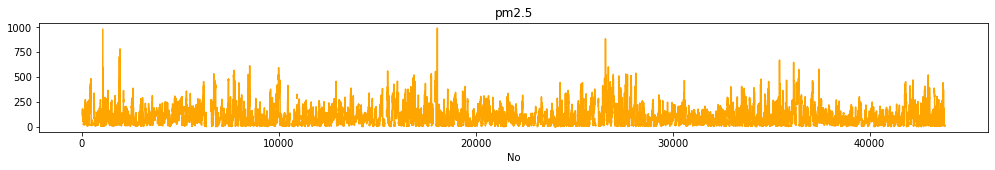

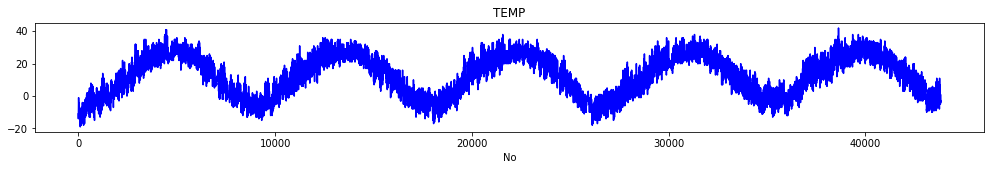

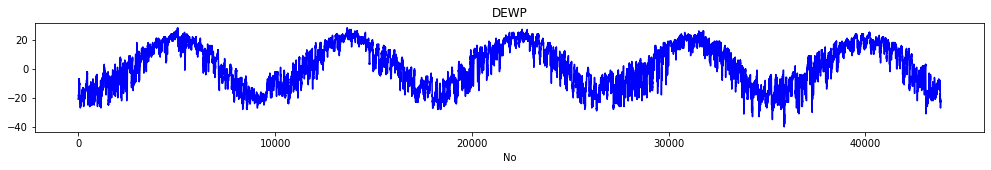

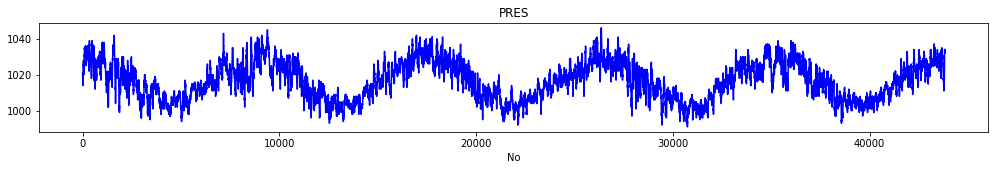

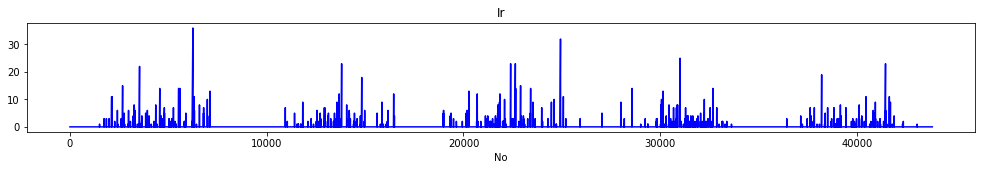

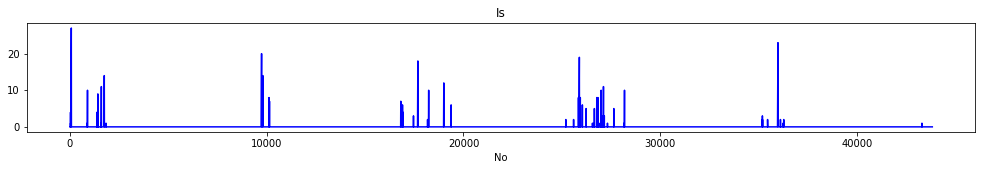

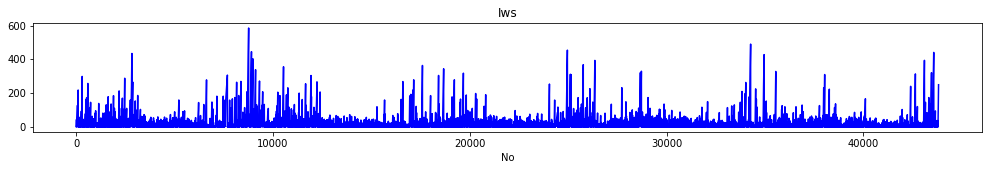

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

for col in df.columns:
    color="orange" if col == "pm2.5" else "blue"
    df[col].plot(figsize=(17, 2), color=color)
    plt.title(col)
    plt.show()

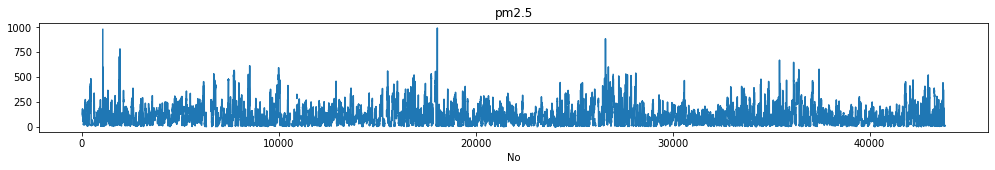

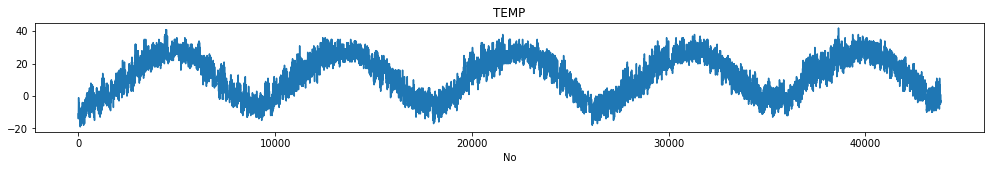

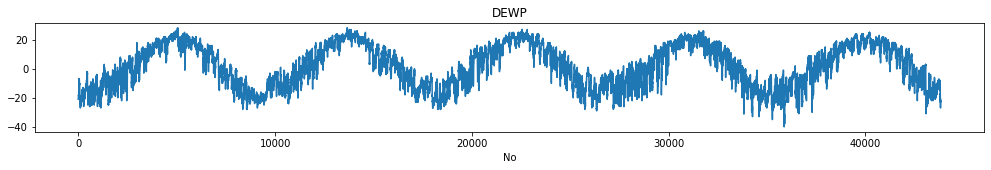

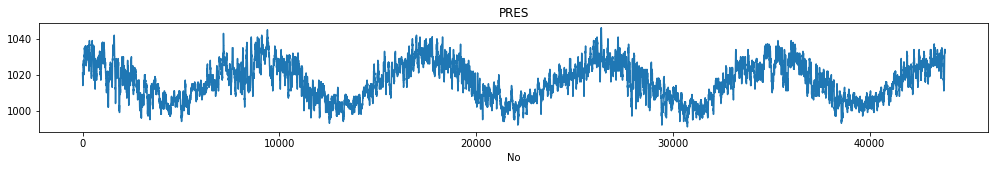

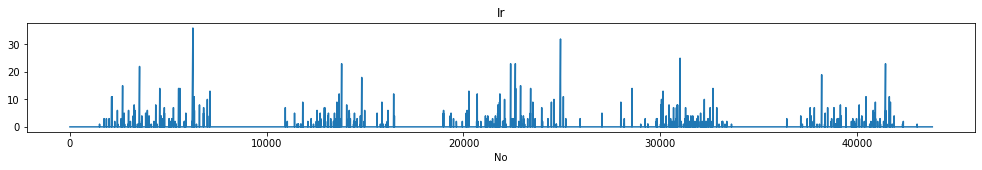

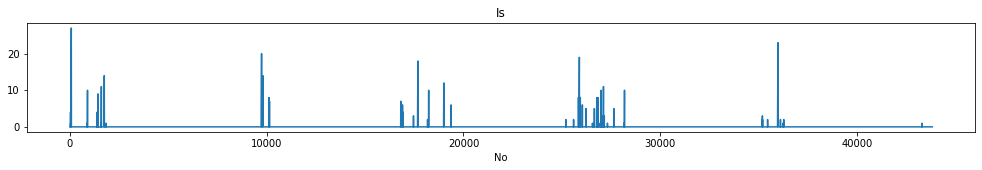

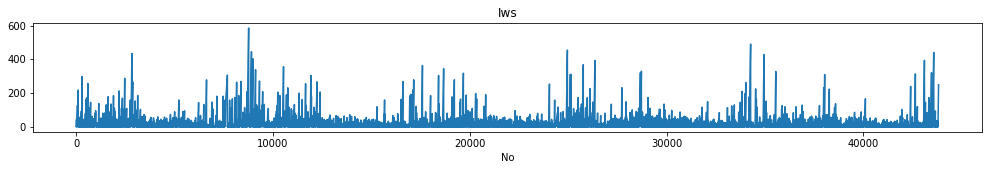

In [66]:
for col in df.columns:
    df[col].plot(figsize=(17, 2))
    plt.title(col)
    plt.show()

In [70]:
df.describe()

,pm2.5,TEMP,DEWP,PRES,Ir,Is,Iws
count,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,98.613215,12.448521,1.817246,1016.447654,0.194916,0.052734,23.889140
std,92.050387,12.198613,14.433440,10.268698,1.415867,0.760375,50.010635
min,0.000000,-19.000000,-40.000000,991.000000,0.000000,0.000000,0.450000
25%,29.000000,2.000000,-10.000000,1008.000000,0.000000,0.000000,1.790000
50%,72.000000,14.000000,2.000000,1016.000000,0.000000,0.000000,5.370000
75%,137.000000,23.000000,15.000000,1025.000000,0.000000,0.000000,21.910000
max,994.000000,42.000000,28.000000,1046.000000,36.000000,27.000000,585.600000


In [85]:
import numpy as np

def subsample_sequence(df, length):
    """
    Given the initial dataframe `df`, return a shorter dataframe sequence of length `length`.
    This shorter sequence should be selected at random
    """
    # $CHALLENGIFY_BEGIN
    last_possible = df.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_sample = df[random_start: random_start+length]
    # $CHALLENGIFY_END
    return df_sample

In [76]:
last_possible = df.shape[0] - 40000


In [77]:
last_possible, df.shape[0]

(3824, 43824)

In [82]:
random_start = np.random.randint(0, last_possible)
random_start

2391

In [84]:
df.shape[0] - 3824

40000

In [86]:
# Test it 
assert subsample_sequence(df, 10).shape == (10, 7)
assert subsample_sequence(df, 40000).shape == (40000, 7)

In [87]:
def split_subsample_sequence(df, length):
    '''Create one single random (X,y) pair'''
    # $CHALLENGIFY_BEGIN
    df_subsample = subsample_sequence(df, length)
    y_sample = df_subsample.iloc[length -1]['pm2.5']
    
    X_sample = df_subsample[0:length -1]
    X_sample = X_sample.values
    # $CHALLENGIFY_END
    return np.array(X_sample), np.array(y_sample)

In [89]:
df_subsample = subsample_sequence(df, 100)

In [90]:
df_subsample

,pm2.5,TEMP,DEWP,PRES,Ir,Is,Iws
No,,,,,,,
27592,116.0,10.0,-17,1025.0,0,0,1.79
27593,144.0,10.0,-17,1025.0,0,0,1.79
27594,163.0,9.0,-16,1025.0,0,0,3.58
27595,164.0,6.0,-14,1026.0,0,0,0.89
27596,185.0,5.0,-13,1027.0,0,0,1.79
...,...,...,...,...,...,...,...
27687,32.0,16.0,-17,1016.0,0,0,13.86
27688,25.0,15.0,-17,1015.0,0,0,3.13
27689,23.0,15.0,-18,1014.0,0,0,1.79


In [92]:
df_subsample.iloc[100 -1]['pm2.5']

277.0

In [96]:
df_subsample[0:100 -1].values

array([[ 1.160e+02,  1.000e+01, -1.700e+01,  1.025e+03,  0.000e+00,
         0.000e+00,  1.790e+00],
       [ 1.440e+02,  1.000e+01, -1.700e+01,  1.025e+03,  0.000e+00,
         0.000e+00,  1.790e+00],
       [ 1.630e+02,  9.000e+00, -1.600e+01,  1.025e+03,  0.000e+00,
         0.000e+00,  3.580e+00],
       [ 1.640e+02,  6.000e+00, -1.400e+01,  1.026e+03,  0.000e+00,
         0.000e+00,  8.900e-01],
       [ 1.850e+02,  5.000e+00, -1.300e+01,  1.027e+03,  0.000e+00,
         0.000e+00,  1.790e+00],
       [ 2.430e+02,  1.000e+00, -1.100e+01,  1.027e+03,  0.000e+00,
         0.000e+00,  8.900e-01],
       [ 2.560e+02, -1.000e+00, -1.000e+01,  1.027e+03,  0.000e+00,
         0.000e+00,  8.900e-01],
       [ 3.560e+02, -2.000e+00, -9.000e+00,  1.028e+03,  0.000e+00,
         0.000e+00,  1.790e+00],
       [ 3.640e+02,  1.000e+00, -1.000e+01,  1.028e+03,  0.000e+00,
         0.000e+00,  3.580e+00],
       [ 4.260e+02,  1.000e+00, -1.000e+01,  1.028e+03,  0.000e+00,
         0.000e+00,  8.

In [97]:


# Test it
(X_sample, y_sample) = split_subsample_sequence(df, 10)
assert X_sample.shape == (9,7)
assert y_sample.shape == ()



In [101]:
X_test, y_test = split_subsample_sequence(df, 40000)

In [103]:
means =X_test.mean()

In [104]:
if means.isna().sum() != 0:
    print('isna')
    #        means.fillna(df_mean, inplace=True)
        

AttributeError: 'numpy.float64' object has no attribute 'isna'

In [109]:
def compute_means(X, df_mean):
    # Compute means of X
    means = X.mean()
    
    # Case if ALL values of at least one feature of X are NaN, then reaplace with the whole df_mean
    if means.isna().sum() != 0:
        means.fillna(df_mean, inplace=True)
        
    return means

def split_subsample_sequence(df, length, df_mean=None):
    '''Return one single random sample (X_sample, y_sample) containing one sequence each of length `length`'''
    # Trick to save time during potential recursive calls
    if df_mean is None:
        df_mean = df.mean()

    df_subsample = subsample_sequence(df, length)
    
    y_sample = df_subsample.iloc[length-1]['pm2.5']
    # Case y_sample is NaN: redraw !
    if y_sample != y_sample: # A value is not equal to itself only for NaN
            X_sample, y_sample = split_subsample_sequence(df, length, df_mean) # Recursive call !!!
            return np.array(X_sample), np.array(y_sample)

    X_sample = df_subsample[0:length-1]
    # Case X_sample has some NaNs
    if X_sample.isna().sum().sum() !=0:
        X_sample = X_sample.fillna(compute_means(X_sample, df_mean))
        X_sample = X_sample.values
        
    return np.array(X_sample), np.array(y_sample)

In [106]:
X.mean()

AttributeError: 'list' object has no attribute 'mean'

In [108]:
pd.DataFrame(X).mean()

0      0.890360
1      0.758160
2      0.423972
3      0.219104
4      0.201127
         ...   
182    0.314749
183    0.315936
184    0.315836
185    0.313248
186    0.313113
Length: 187, dtype: float64

In [110]:
def get_X_y(df, n_sequences, length):
    '''Return a list of samples (X, y)'''
    # $CHALLENGIFY_BEGIN
    X, y = [], []

    for i in range(n_sequences):
        (xi, yi) = split_subsample_sequence(df, length)
        X.append(xi)
        y.append(yi)
        
    X = np.array(X)
    y = np.array(y)
    # $CHALLENGIFY_END
    return X, y

In [111]:
X, y = get_X_y(df, 2000, 21)
print(X.shape)
print(y.shape)

(2000, 20, 7)
(2000,)


In [112]:
assert X.shape == (2000, 20, 7)
assert y.shape == (2000, )
assert np.isnan(X).sum() == 0

In [113]:
len_ = int(0.8*df.shape[0])
df_train = df[:len_]
df_test = df[len_:]

In [114]:
X_train, y_train = get_X_y(df_train, 2000, 21)
X_test, y_test = get_X_y(df_test, 400, 21)

In [116]:
assert X_train.shape == (2000, 20, 7)

In [115]:
y_pred = np.mean(y_train)
bench_res = np.mean(np.abs(y_pred - y_test)/y_test)*100

print(f'Benchmark MAPE on the test set : {bench_res:.0f} %')

Benchmark MAPE on the test set : 194 %


In [117]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization

def init_model():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)
    
    normalizer = Normalization()
    normalizer.adapt(X_train)

    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

In [133]:
model = init_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, None, 7)           15        
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                2240      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 2,366
Trainable params: 2,351
Non-trainable params: 15
_________________________________________________________________


In [134]:
from tensorflow.keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor='mean_absolute_percentage_error', verbose=1, patience=10, restore_best_weights=True)
es = EarlyStopping(verbose=1, patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train,
            validation_split=0.2,
            epochs=1000, 
            batch_size=64,
            callbacks=[es], verbose=1)

Epoch 1/1000
25/25 [==============================] - 4s 48ms/step - loss: 16563.7104 - mean_absolute_percentage_error: 87.8450 - val_loss: 11677.6396 - val_mean_absolute_percentage_error: 73.9637
Epoch 2/1000
25/25 [==============================] - 0s 13ms/step - loss: 13356.1439 - mean_absolute_percentage_error: 82.4961 - val_loss: 8879.8301 - val_mean_absolute_percentage_error: 103.1781
Epoch 3/1000
25/25 [==============================] - 0s 13ms/step - loss: 8798.2353 - mean_absolute_percentage_error: 110.0896 - val_loss: 6786.2656 - val_mean_absolute_percentage_error: 98.9535
Epoch 4/1000
25/25 [==============================] - 0s 13ms/step - loss: 7215.1398 - mean_absolute_percentage_error: 92.1192 - val_loss: 4453.6636 - val_mean_absolute_percentage_error: 64.4647
Epoch 5/1000
25/25 [==============================] - 0s 13ms/step - loss: 4806.6738 - mean_absolute_percentage_error: 65.0378 - val_loss: 2914.2095 - val_mean_absolute_percentage_error: 60.8524
Epoch 6/1000
25/25 [

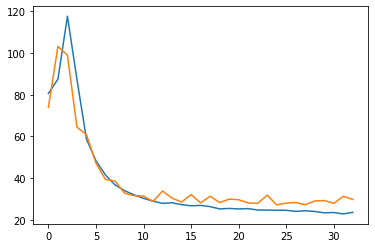

In [135]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])

In [136]:
res = model.evaluate(X_test, y_test, verbose=0)

print(f'MAPE on the test set : {res[1]:.0f} %')

MAPE on the test set : 24 %


In [137]:
def init_model_2():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.005)
    normalizer = Normalization()
    normalizer.adapt(X_train)
    
    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

model_2 = init_model_2()

es = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True)

history_2 = model_2.fit(X_train, y_train,
            validation_split=0.3,
            epochs=1000, 
            batch_size=32,
            callbacks=[es], verbose=1)

Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping


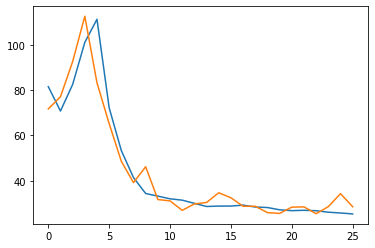

In [138]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['mean_absolute_percentage_error'])
plt.plot(history_2.history['val_mean_absolute_percentage_error'])

In [139]:
res = model_2.evaluate(X_test, y_test, verbose=0)

print(f'MAPE on the test set : {res[1]:.0f} %')

MAPE on the test set : 21 %


In [141]:
def train_model(nb_sequences=2000, nb_days=21, plot_history=False):
    X_train, y_train = get_X_y(df_train, nb_sequences, nb_days)
    X_test, y_test = get_X_y(df_test, round(nb_sequences*0.2), nb_days)

    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)

    normalizer = Normalization()
    normalizer.adapt(X_train)

    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])


    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train, y_train,
            validation_split=0.3,
            epochs=1000, 
            batch_size=64,
            callbacks=[es],
            verbose=1)

    if plot_history:
        plt.plot(history.history['mean_absolute_percentage_error'])
        plt.plot(history.history['val_mean_absolute_percentage_error'])
        plt.show()

    res = model.evaluate(X_test, y_test, verbose=0)
    return res

Epoch 1/1000
22/22 [==============================] - 9s 131ms/step - loss: 17568.2965 - mean_absolute_percentage_error: 90.2509 - val_loss: 15159.7412 - val_mean_absolute_percentage_error: 75.6980
Epoch 2/1000
22/22 [==============================] - 1s 34ms/step - loss: 13938.1840 - mean_absolute_percentage_error: 70.8341 - val_loss: 13576.9414 - val_mean_absolute_percentage_error: 69.8842
Epoch 3/1000
22/22 [==============================] - 1s 34ms/step - loss: 13247.1709 - mean_absolute_percentage_error: 73.6365 - val_loss: 12019.9404 - val_mean_absolute_percentage_error: 75.0007
Epoch 4/1000
22/22 [==============================] - 1s 33ms/step - loss: 10900.1596 - mean_absolute_percentage_error: 85.6302 - val_loss: 10468.9316 - val_mean_absolute_percentage_error: 85.5824
Epoch 5/1000
22/22 [==============================] - 1s 32ms/step - loss: 9840.1090 - mean_absolute_percentage_error: 99.4869 - val_loss: 8999.7432 - val_mean_absolute_percentage_error: 89.6345
Epoch 6/1000
22/

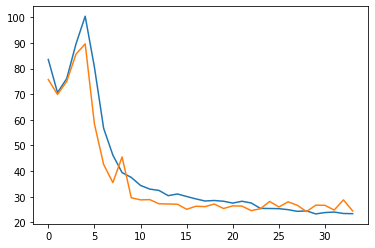

[589.8317260742188, 24.288135528564453]

In [142]:
train_model(nb_sequences=2000, nb_days=21, plot_history=True)

In [143]:
nb_days_grid = [11, 21, 41, 61, 81, 121, 151]
nb_sequences_grid = [1000, 2000, 4000]
MAPE = []